# PCA

## Imports

In [25]:
from utilities.std_imports import *
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler

## Load data

In [2]:
dataset = datasets.load_breast_cancer()
X = dataset.data
print(X.shape)
X

(569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## Scale

In [3]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

## PCA with 2 components

In [22]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.fit_transform(X_std)
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

## Show results

(569, 2)


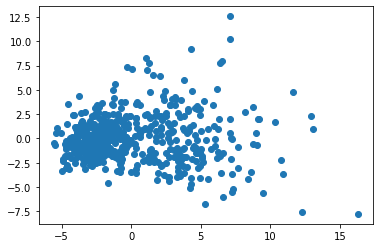

In [23]:
print(X_pca.shape)
X_pca
plt.scatter(X_pca[:,0], X_pca[:,1]);

In [24]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [40]:
df_pca = pd.DataFrame(abs(pca.components_))
df_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,0.233857,0.059706,0.215181,0.231077,0.186113,0.151892,0.060165,0.034768,0.190349,0.366575,...,0.219866,0.045467,0.199878,0.219352,0.172304,0.143593,0.097964,0.008257,0.141883,0.275339


In [41]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [45]:
s = [sum(df_pca.iloc[0]), sum(df_pca.iloc[1])]

In [47]:
for i in range(2):
    df_pca.iloc[0] = df_pca.iloc[0]/s[i] * pca.explained_variance_ratio_[i]


In [48]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000741,0.000351,0.000770,0.000748,0.000482,0.000810,0.000874,0.000883,0.000467,0.000218,...,0.000771,0.000353,0.000801,0.000761,0.000433,0.000711,0.000774,0.000849,0.000416,0.000446
1,0.233857,0.059706,0.215181,0.231077,0.186113,0.151892,0.060165,0.034768,0.190349,0.366575,...,0.219866,0.045467,0.199878,0.219352,0.172304,0.143593,0.097964,0.008257,0.141883,0.275339


In [49]:
df_pca.loc['Total']= df_pca.sum()
df_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000741,0.000351,0.000770,0.000748,0.000482,0.000810,0.000874,0.000883,0.000467,0.000218,...,0.000771,0.000353,0.000801,0.000761,0.000433,0.000711,0.000774,0.000849,0.000416,0.000446
1,0.233857,0.059706,0.215181,0.231077,0.186113,0.151892,0.060165,0.034768,0.190349,0.366575,...,0.219866,0.045467,0.199878,0.219352,0.172304,0.143593,0.097964,0.008257,0.141883,0.275339
Total,0.234598,0.060057,0.215951,0.231824,0.186595,0.152701,0.061040,0.035650,0.190816,0.366793,...,0.220638,0.045821,0.200679,0.220113,0.172737,0.144304,0.098738,0.009106,0.142299,0.275785


In [50]:
tot = sum(df_pca.loc['Total'])
df_pca.loc['Total'] = round(df_pca.loc['Total']*100/tot,2)

In [52]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000741,0.000351,0.000770,0.000748,0.000482,0.000810,0.000874,0.000883,0.000467,0.000218,...,0.000771,0.000353,0.000801,0.000761,0.000433,0.000711,0.000774,0.000849,0.000416,0.000446
1,0.233857,0.059706,0.215181,0.231077,0.186113,0.151892,0.060165,0.034768,0.190349,0.366575,...,0.219866,0.045467,0.199878,0.219352,0.172304,0.143593,0.097964,0.008257,0.141883,0.275339
Total,4.750000,1.220000,4.370000,4.700000,3.780000,3.090000,1.240000,0.720000,3.870000,7.430000,...,4.470000,0.930000,4.070000,4.460000,3.500000,2.920000,2.000000,0.180000,2.880000,5.590000
